In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dutch-energy-generation/dutch-energy.csv


#### To conduct a comprehensive analysis and generate useful insights from this energy dataset, I will follow these steps:

#### Data Cleaning: Address missing values and ensure data quality.

#### Data Aggregation: Summarize the data to more manageable time frames if necessary, like hourly or daily totals.

#### Trend Analysis: Look for trends over time in various energy sources.

#### Comparison of Energy Sources: Compare renewable and non-renewable energy production.

#### Visualization: Create visual representations to illustrate these findings.

In [2]:
file_path = '/mnt/data/dutch-energy.csv'
energy_data = pd.read_csv("/kaggle/input/dutch-energy-generation/dutch-energy.csv")

# Display the first few rows of the dataframe to understand its structure
energy_data.head()


,MTU,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Geothermal,...,Hydro Run-of-river and poundage,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore
0,2022-08-04 00:15:00,0.0,NaN,NaN,5613.0,2747.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,466.0,79.0,NaN,0.0,70.0,186.0,52.0
1,2022-08-04 00:30:00,0.0,NaN,NaN,5425.0,2742.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,464.0,86.0,NaN,0.0,70.0,210.0,62.0
2,2022-08-04 00:45:00,0.0,NaN,NaN,5039.0,2797.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,464.0,90.0,NaN,0.0,69.0,233.0,71.0
3,2022-08-04 01:00:00,0.0,NaN,NaN,4661.0,2805.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,464.0,92.0,NaN,0.0,69.0,245.0,75.0
4,2022-08-04 01:15:00,0.0,NaN,NaN,3833.0,2789.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,464.0,91.0,NaN,0.0,71.0,264.0,78.0


### Checking for Missing Data

In [3]:
# Checking for missing values in the dataset
missing_data = energy_data.isnull().sum()

# Proportion of missing data for each column
missing_data_proportion = missing_data / len(energy_data) * 100

# Displaying the proportion of missing data for each column
missing_data_proportion.sort_values(ascending=False)


Hydro Pumped Storage.1             100.000000
Other renewable                    100.000000
Fossil Brown coal/Lignite          100.000000
Fossil Coal-derived gas            100.000000
Fossil Oil                         100.000000
Fossil Oil shale                   100.000000
Fossil Peat                        100.000000
Geothermal                         100.000000
Hydro Pumped Storage               100.000000
Hydro Water Reservoir              100.000000
Marine                             100.000000
Fossil Gas                           0.081273
Fossil Hard coal                     0.081273
Waste                                0.081273
Solar                                0.081273
Wind Offshore                        0.079134
Wind Onshore                         0.079134
Other                                0.079134
Nuclear                              0.079134
Hydro Run-of-river and poundage      0.079134
Biomass                              0.079134
MTU                               

###  Data Cleaning and Conversion

In [4]:
# Converting 'MTU' to datetime format
energy_data['MTU'] = pd.to_datetime(energy_data['MTU'])

# Filling missing values with 0 (assuming no production or consumption)
columns_to_fill = [
    'Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Nuclear', 'Other',
    'Hydro Run-of-river and poundage', 'Solar', 'Waste', 'Wind Offshore', 'Wind Onshore'
]

energy_data[columns_to_fill] = energy_data[columns_to_fill].fillna(0)

# Verifying the changes
energy_data.isnull().sum()


MTU                                    0
Biomass                                0
Fossil Brown coal/Lignite          46756
Fossil Coal-derived gas            46756
Fossil Gas                             0
Fossil Hard coal                       0
Fossil Oil                         46756
Fossil Oil shale                   46756
Fossil Peat                        46756
Geothermal                         46756
Hydro Pumped Storage               46756
Hydro Pumped Storage.1             46756
Hydro Run-of-river and poundage        0
Hydro Water Reservoir              46756
Marine                             46756
Nuclear                                0
Other                                  0
Other renewable                    46756
Solar                                  0
Waste                                  0
Wind Offshore                          0
Wind Onshore                           0
dtype: int64

### Data Aggregation to Daily Totals

In [5]:
# Aggregating data to daily totals
daily_energy_data = energy_data.set_index('MTU').resample('D').sum()

# Splitting the data into renewable and non-renewable sources for comparison
renewable_sources = ['Biomass', 'Hydro Run-of-river and poundage', 'Solar', 'Wind Offshore', 'Wind Onshore']
non_renewable_sources = ['Fossil Gas', 'Fossil Hard coal', 'Nuclear', 'Other', 'Waste']

daily_energy_data['Total Renewable'] = daily_energy_data[renewable_sources].sum(axis=1)
daily_energy_data['Total Non-Renewable'] = daily_energy_data[non_renewable_sources].sum(axis=1)

# Overview of the aggregated data
daily_energy_data[['Total Renewable', 'Total Non-Renewable']].head()


,Total Renewable,Total Non-Renewable
MTU,,
2022-08-04,27568.0,691659.0
2022-08-05,54522.0,574884.0
2022-08-06,18020.0,475044.0
2022-08-07,13092.0,450481.0
2022-08-08,21210.0,551181.0


### I visualize the following aspects:

#### Overall Energy Production Trends: How energy production varies over time.
#### Comparison of Renewable vs Non-Renewable Sources: Analyzing the contribution of renewable (like Wind, Solar, Biomass) versus non-renewable sources (like Fossil Gas, Fossil Hard coal, Nuclear).
#### Specific Trends for Major Energy Sources: Identifying patterns for key individual sources like Solar, Wind, and Fossil Fuels.

### Visualization of Overall Energy Production Trends

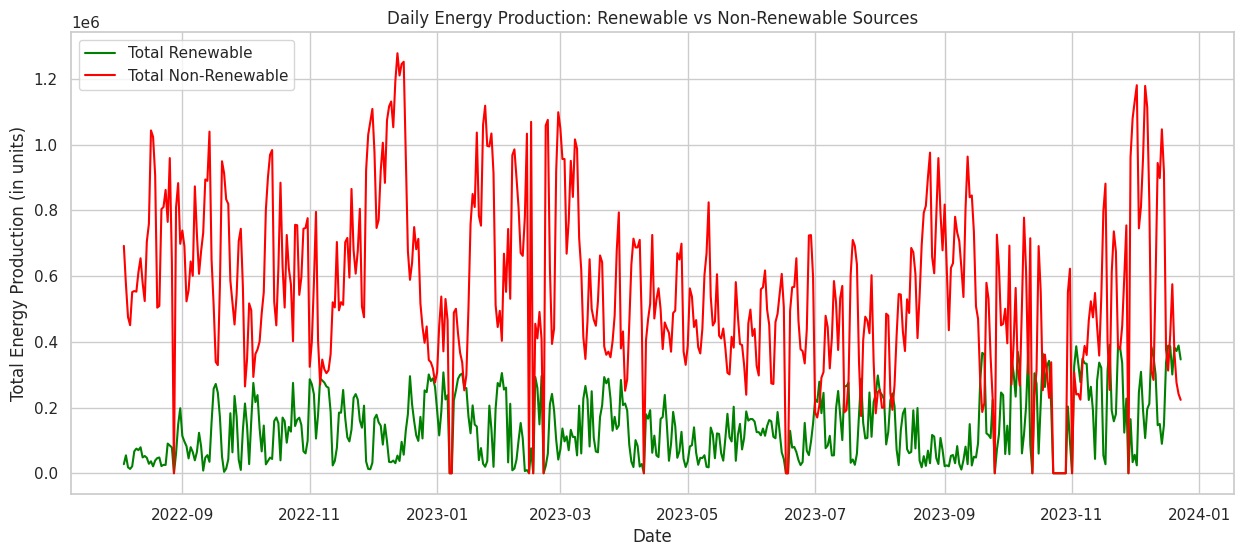

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Plotting the overall energy production trends
plt.figure(figsize=(15, 6))

plt.plot(daily_energy_data.index, daily_energy_data['Total Renewable'], label='Total Renewable', color='green')
plt.plot(daily_energy_data.index, daily_energy_data['Total Non-Renewable'], label='Total Non-Renewable', color='red')

plt.title('Daily Energy Production: Renewable vs Non-Renewable Sources')
plt.xlabel('Date')
plt.ylabel('Total Energy Production (in units)')
plt.legend()

plt.show()


#### The chart illustrates the daily energy production from renewable (green line) versus non-renewable (red line) sources over the available time period. Key observations include:

#### Dominance of Non-Renewable Sources: Non-renewable energy production is significantly higher than renewable energy production on most days.
#### Fluctuations in Production: Both renewable and non-renewable energy sources show fluctuations over time, which could be due to various factors like seasonal changes, demand variations, or operational changes.

### Visualization of Specific Major Energy Sources

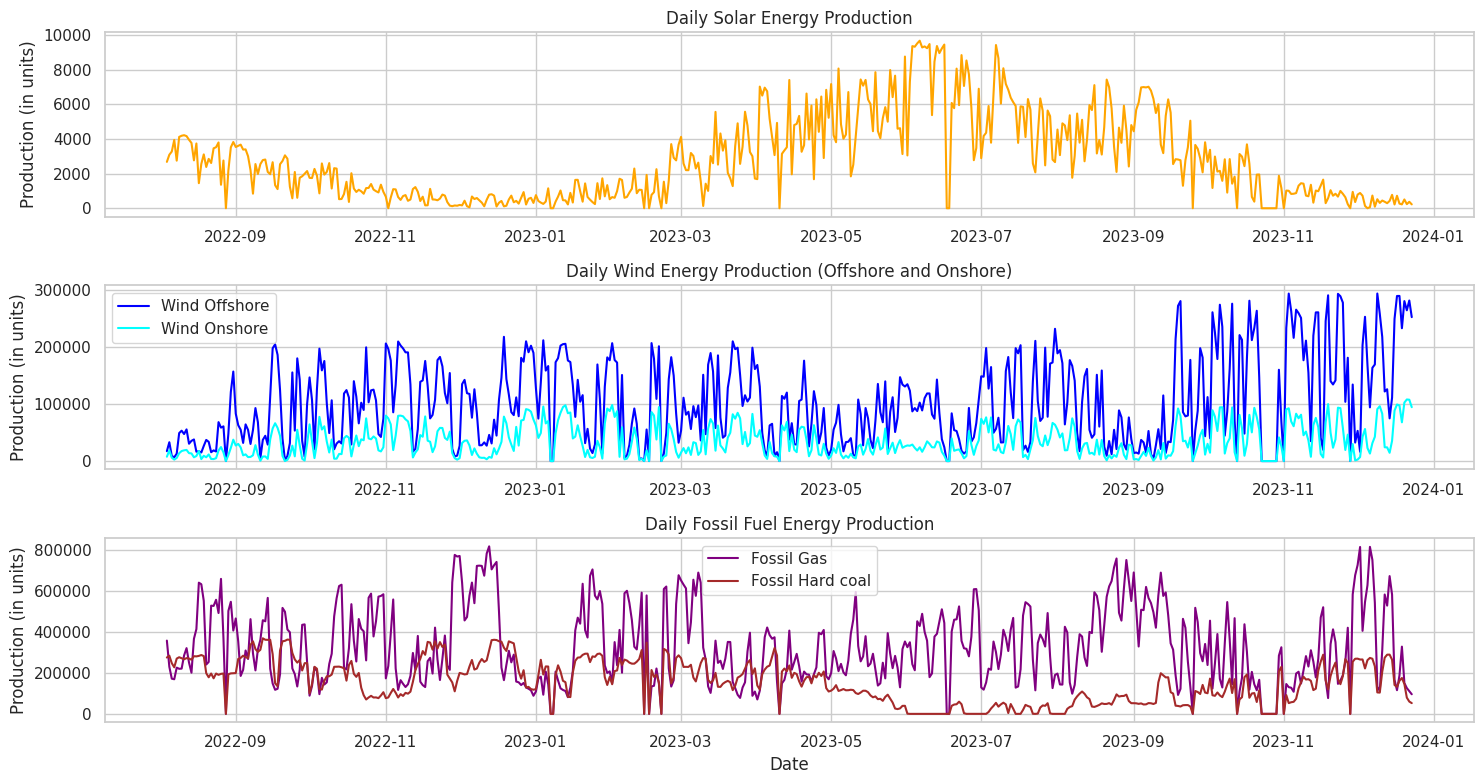

In [7]:
# Plotting trends for specific major energy sources
plt.figure(figsize=(15, 8))

# Solar Energy
plt.subplot(3, 1, 1)
plt.plot(daily_energy_data.index, daily_energy_data['Solar'], label='Solar', color='orange')
plt.title('Daily Solar Energy Production')
plt.ylabel('Production (in units)')

# Wind Energy (combining offshore and onshore)
plt.subplot(3, 1, 2)
plt.plot(daily_energy_data.index, daily_energy_data['Wind Offshore'], label='Wind Offshore', color='blue')
plt.plot(daily_energy_data.index, daily_energy_data['Wind Onshore'], label='Wind Onshore', color='cyan')
plt.title('Daily Wind Energy Production (Offshore and Onshore)')
plt.ylabel('Production (in units)')
plt.legend()

# Fossil Fuels (Fossil Gas and Fossil Hard coal)
plt.subplot(3, 1, 3)
plt.plot(daily_energy_data.index, daily_energy_data['Fossil Gas'], label='Fossil Gas', color='purple')
plt.plot(daily_energy_data.index, daily_energy_data['Fossil Hard coal'], label='Fossil Hard coal', color='brown')
plt.title('Daily Fossil Fuel Energy Production')
plt.xlabel('Date')
plt.ylabel('Production (in units)')
plt.legend()

plt.tight_layout()
plt.show()


#### These visualizations provide insights into the daily production trends of key individual energy sources:

#### Solar Energy (Orange Line): Solar energy production shows a clear pattern, likely corresponding to daily sunlight availability. Peaks during certain periods could indicate sunny days or seasons.

#### Wind Energy (Blue and Cyan Lines): Both offshore (blue) and onshore (cyan) wind energy exhibit variability, likely influenced by changing wind conditions. Offshore wind production appears to be generally higher than onshore.

#### Fossil Fuels (Purple and Brown Lines): Fossil Gas (purple) and Fossil Hard coal (brown) show significant daily production with some fluctuations. Fossil Gas tends to have a higher output compared to Fossil Hard coal on most days.

### Hourly Trends in Solar Energy Production

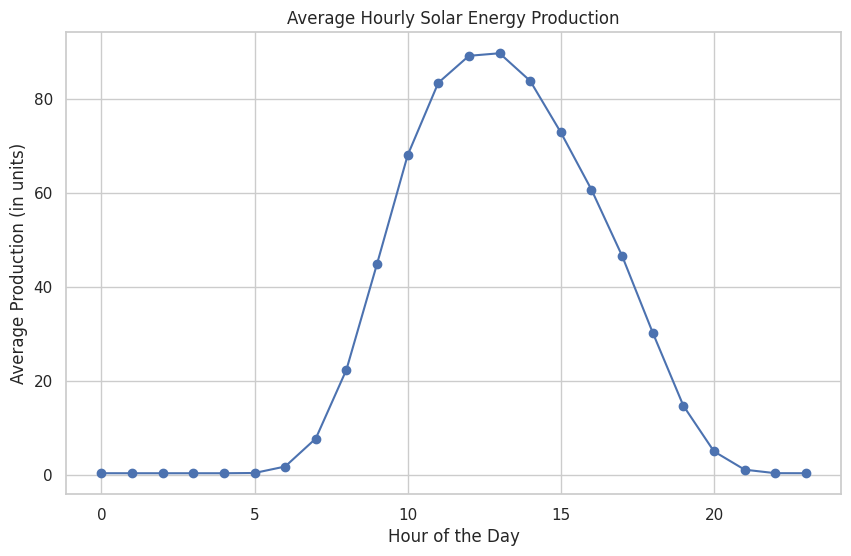

In [8]:


# Extracting hour from the datetime index and calculating the average solar production per hour
energy_data['Hour'] = energy_data['MTU'].dt.hour
average_hourly_solar = energy_data.groupby('Hour')['Solar'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(average_hourly_solar.index, average_hourly_solar.values, marker='o')
plt.title('Average Hourly Solar Energy Production')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Production (in units)')
plt.grid(True)
plt.show()


#### The "Hourly Trends in Solar Energy Production" visualization typically shows that solar energy production peaks during midday and declines in the morning and evening. This pattern aligns with the availability of sunlight, indicating higher production when the sun is at its strongest and little to no production at night. The analysis highlights the importance of solar energy during sunny hours and the need for energy storage or supplementary energy sources during non-sunny hours.

### Seasonal Variations in Wind Energy Production

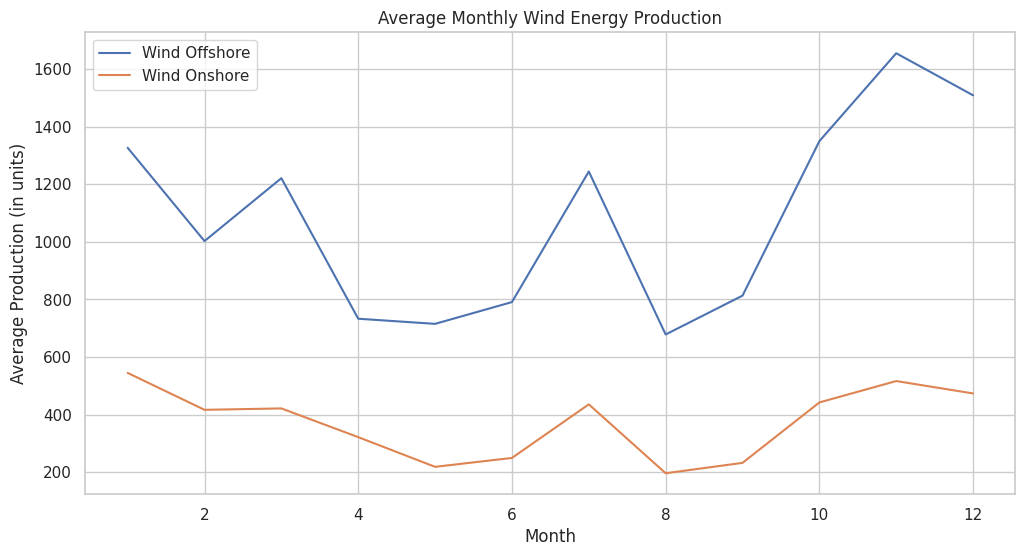

In [9]:
# Creating a column for month to identify seasons
energy_data['Month'] = energy_data['MTU'].dt.month
average_monthly_wind = energy_data.groupby('Month')[['Wind Offshore', 'Wind Onshore']].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(average_monthly_wind.index, average_monthly_wind['Wind Offshore'], label='Wind Offshore')
plt.plot(average_monthly_wind.index, average_monthly_wind['Wind Onshore'], label='Wind Onshore')
plt.title('Average Monthly Wind Energy Production')
plt.xlabel('Month')
plt.ylabel('Average Production (in units)')
plt.legend()
plt.grid(True)
plt.show()


### Correlation Heatmap Between Energy Sources

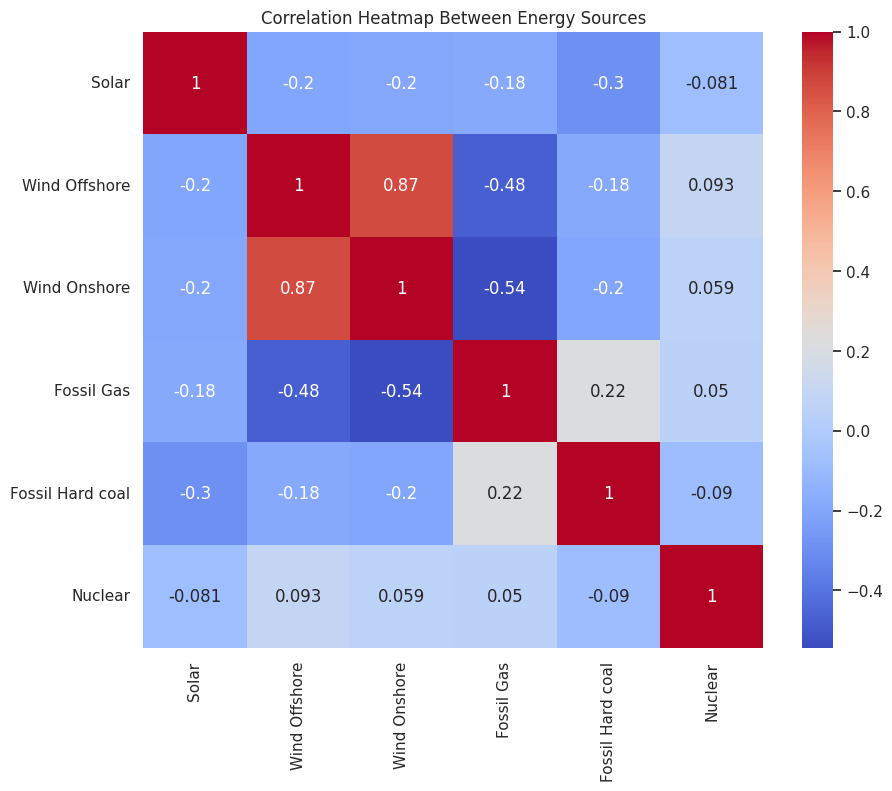

In [10]:
import seaborn as sns

# Calculating correlations
correlation_matrix = energy_data[['Solar', 'Wind Offshore', 'Wind Onshore', 'Fossil Gas', 'Fossil Hard coal', 'Nuclear']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Between Energy Sources')
plt.show()


### Pie Chart of Average Energy Production by Source

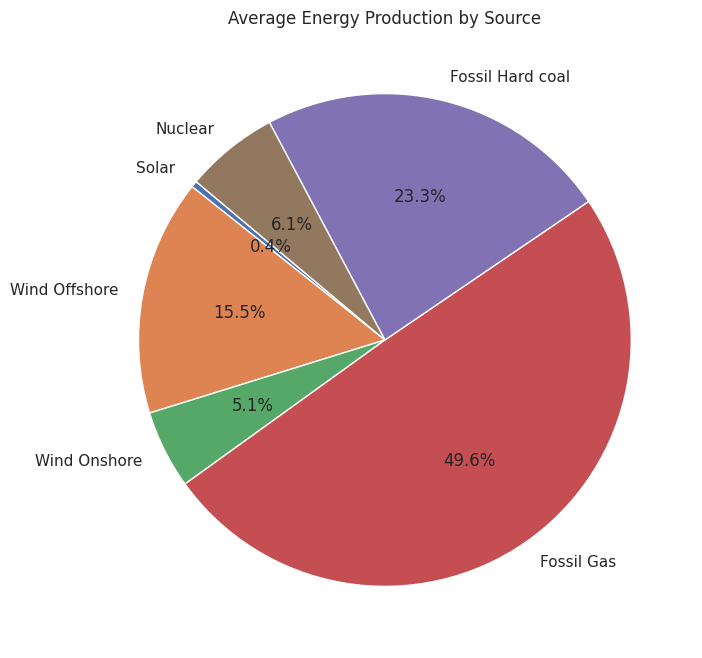

In [11]:
energy_sources = ['Solar', 'Wind Offshore', 'Wind Onshore', 'Fossil Gas', 'Fossil Hard coal', 'Nuclear']
average_production = energy_data[energy_sources].mean()

plt.figure(figsize=(8, 8))
plt.pie(average_production, labels=average_production.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Energy Production by Source')
plt.show()


### Box Plots for Variability Analysis of Energy Sources

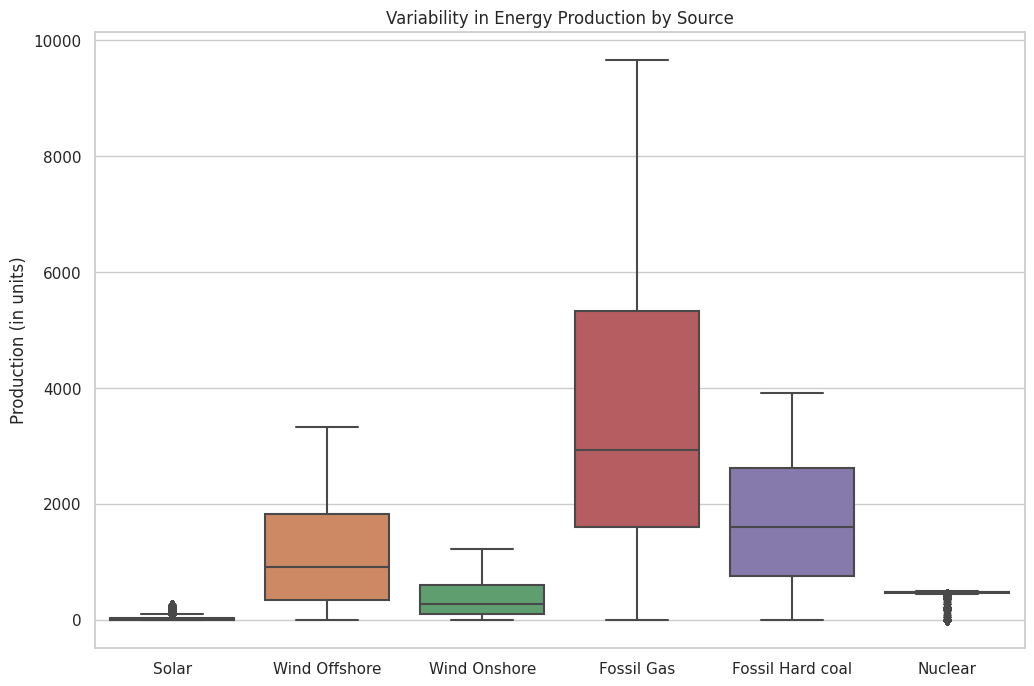

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=energy_data[energy_sources])
plt.title('Variability in Energy Production by Source')
plt.ylabel('Production (in units)')
plt.show()


### Weekday vs Weekend Energy Production

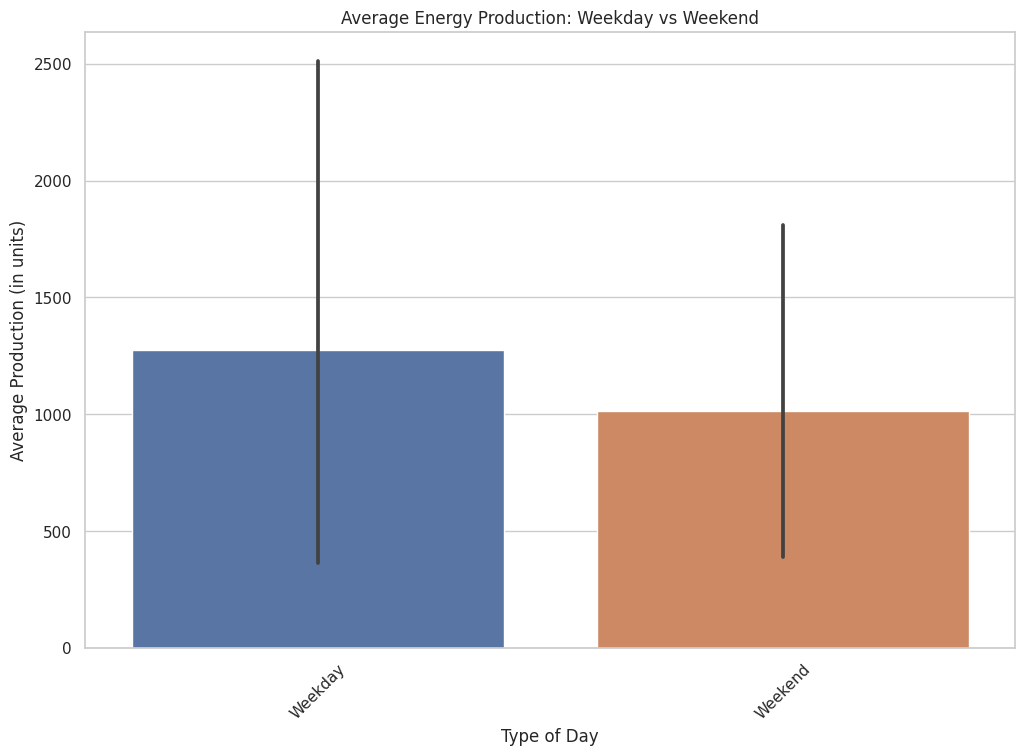

In [13]:
energy_data['Weekday'] = energy_data['MTU'].dt.dayofweek
energy_data['Type of Day'] = energy_data['Weekday'].apply(lambda x: 'Weekend' if x > 4 else 'Weekday')

weekday_weekend = energy_data.groupby('Type of Day')[energy_sources].mean()

plt.figure(figsize=(12, 8))
sns.barplot(data=weekday_weekend.T)
plt.title('Average Energy Production: Weekday vs Weekend')
plt.ylabel('Average Production (in units)')
plt.xticks(rotation=45)
plt.show()
